In [1]:
import keras 
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout
from keras.layers.convolutional import Conv2D,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator ,load_img
from tensorflow.keras.layers import BatchNormalization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split

In [2]:
#Importing Data from CSV file
data=pd.read_csv("fer2013.csv")

In [3]:
labels=data.iloc[:,[0]].values
pixels=data['pixels']
#Facial Expressions
Expressions={0:"Angry",1:"Disgust",2:"Fear",3:"Happy",4:"Sad",5:"Surprise",6:"Neutral"}
from keras.utils import to_categorical 
labels = to_categorical(labels,len(Expressions))


'Disgust'

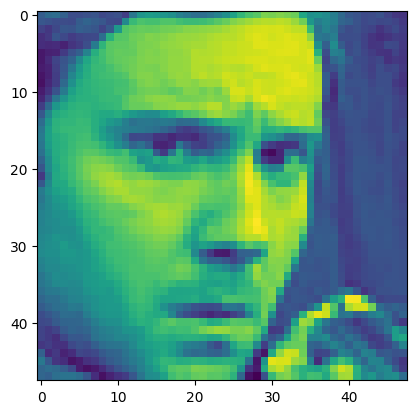

In [4]:
#converting pixels to Gray Scale images of 48X48 
images = np.array([np.fromstring(pixel, dtype=int, sep=" ")for pixel in pixels])
images=images/255.0
images = images.reshape(images.shape[0],48,48,1).astype('float32')


plt.imshow(images[0][:,:,0])
Expressions[labels[0][0]]



In [5]:
#splitting data into training and test data
train_images,test_images,train_labels,test_labels = train_test_split(images,labels,test_size=0.2,random_state=0)

In [6]:
train_labels

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [7]:
def create_convolutional_model(classes):
    model = Sequential()
    model.add(Conv2D(32,kernel_size=(2,2),strides=(1,1),activation='relu',input_shape=(48,48,1)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(filters=64,kernel_size=(2,2),strides=(1,1),activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1)))
    model.add(Dropout(0.25))#to prevent neural network from overfitting
    
    model.add(Conv2D(filters=128,kernel_size=(2,2),strides=(1,1),activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(filters=256,kernel_size=(2,2),strides=(1,1),activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    
    model.add(Dense(256,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Dense(512,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Dense(classes,activation='softmax'))
    
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model 

In [8]:
classes=7
model = create_convolutional_model(classes)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 47, 47, 32)        160       
                                                                 
 batch_normalization (BatchN  (None, 47, 47, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 23, 23, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 64)        8256      
                                                                 
 batch_normalization_1 (Batc  (None, 22, 22, 64)       2

In [9]:
#train the CNN 
model.fit(train_images,train_labels,batch_size=105,epochs=30,verbose=1)

Epoch 1/30
274/274 [==============================] - 325s 1s/step - loss: 1.8523 - accuracy: 0.3327
Epoch 2/30
274/274 [==============================] - 267s 975ms/step - loss: 1.5023 - accuracy: 0.4311
Epoch 3/30
274/274 [==============================] - 268s 979ms/step - loss: 1.3253 - accuracy: 0.4928
Epoch 4/30
274/274 [==============================] - 264s 964ms/step - loss: 1.2237 - accuracy: 0.5332
Epoch 5/30
274/274 [==============================] - 277s 1s/step - loss: 1.1412 - accuracy: 0.5648
Epoch 6/30
274/274 [==============================] - 265s 968ms/step - loss: 1.0702 - accuracy: 0.5924
Epoch 7/30
274/274 [==============================] - 269s 982ms/step - loss: 1.0091 - accuracy: 0.6211
Epoch 8/30
274/274 [==============================] - 264s 963ms/step - loss: 0.9699 - accuracy: 0.6360
Epoch 9/30
274/274 [==============================] - 265s 968ms/step - loss: 0.8700 - accuracy: 0.6754
Epoch 10/30
274/274 [==============================] - 270s 984ms/step

In [9]:
label_pred=model.predict(test_images)
label_pred=np.argmax(label_pred,axis = 1)

225/225 [==============================] - 13s 56ms/step


Normalized confusion matrix
[[0.         0.97190427 0.         0.         0.02289282 0.00104058
  0.00416233]
 [0.         0.98113208 0.         0.         0.01886792 0.
  0.        ]
 [0.         0.98210736 0.         0.         0.0139165  0.
  0.00397614]
 [0.         0.98366903 0.         0.         0.01306478 0.
  0.00326619]
 [0.         0.96907216 0.         0.         0.0222046  0.
  0.00872324]
 [0.         0.99123905 0.         0.         0.00375469 0.
  0.00500626]
 [0.         0.97682119 0.         0.         0.01986755 0.
  0.00331126]]


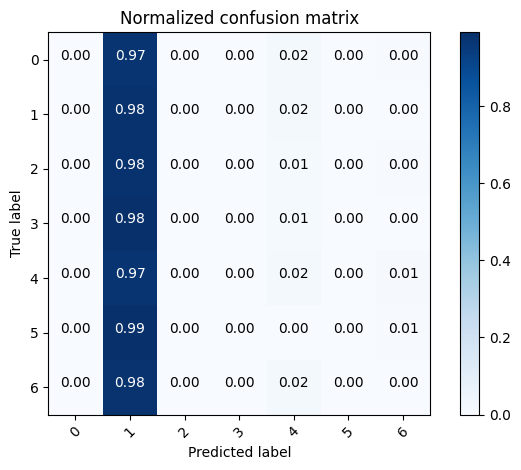

In [10]:
import itertools
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

test_labels=np.argmax(test_labels,axis=1)
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_labels,label_pred)
class_names=Expressions
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [12]:
#Save the weights
filename='model_weights.hdf5'
model.save_weights(filename,overwrite=True)

[TIP] Next time specify overwrite=True!


In [23]:
#Load the weights
filename='model_weights.hdf5'
model.load_weights(filename)

In [4]:
import numpy as np
import cv2
def make_prediction(unknown):
    unknown=cv2.resize(unknown,(48,48))
    unknown=unknown/255.0
    unknown=np.array(unknown).reshape(-1,48,48,1)
    predict=np.argmax(model.predict(unknown),axis = 1)
    return predict[0]  

In [2]:
def face_in_video():
    face_cascade = cv2.CascadeClassifier("C:\\Users\\ayatu\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python310\\site-packages\\cv2\\data\\haarcascade_frontalface_default.xml")
    # eye_cascade = cv2.CascadeClassifier("C:\\Users\\ayatu\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python310\\site-packages\\cv2\\data\\haarcascade_eye.xml" )
    cap=cv2.VideoCapture(0)
    
    while True:
        ret,img=cap.read()  
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray,1.3,5)
        
        for (x,y,w,h) in faces:
            sub_face = gray[y:y+h, x:x+w]
            cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
            res=make_prediction(sub_face)
            font = cv2.FONT_HERSHEY_SIMPLEX
            cv2.putText(img,str(Expressions[res]),(x,y-5),font,0.5,(205,200,50),1,cv2.LINE_AA)
        cv2.imshow('img',img)
        if cv2.waitKey(1) & 0xFF ==ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()  

In [24]:
face_in_video()

1/1 [==============================] - 0s 43ms/step
